In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import scipy.stats as stats
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam

In [141]:
dataset1 = 'Small_Datasets/2-wayEpi_100feat.txt'
dataset2 = 'Small_Datasets/4-wayAdditive_100feat.txt'
dataset3 = 'Small_Datasets/2Additive_2-wayEpi_100feat.txt'
dataset4 = 'Small_Datasets/4-wayHeterogeneous_100feat.txt'
# dataset5 = 'Large_Datasets/2-wayEpi_100000feat.txt'
#dataset6 = 'Large_Datasets/4-wayAdditive_100000feat.txt'
#dataset7 = 'Large_Datasets/2Additive_2-wayEpi_100000feat.txt'
#dataset8 = 'Large_Datasets/4-wayHeterogeneous_100000feat.txt'
df = pd.read_csv(dataset1, sep='\t', )

In [142]:
# Setup the data to calculate the odds ratio
df = df.dropna()
X = df.drop(columns=['Class'])
y = df['Class']
df.head()

,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,...,N91,N92,N93,N94,N95,N96,N97,M0P1,M0P2,Class
0,0,0,0,0,2,0,1,1,0,2,...,1,1,1,1,0,0,0,0,0,1
1,1,0,0,1,0,1,1,0,0,1,...,0,1,1,0,0,0,0,0,0,1
2,0,1,0,2,0,1,0,0,0,0,...,0,1,1,1,0,1,2,0,0,1
3,2,1,0,2,1,0,0,1,0,0,...,0,0,2,0,0,0,1,0,0,1
4,1,0,0,0,2,0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,1


In [143]:
# Shuffle the data and split it into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Change the position of the columns in random order
# X_train = X_train.sample(frac=1, axis=1, random_state=42)
# X_test = X_test[X_train.columns]

In [144]:
print(X_train.columns)

Index(['N0', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10',
       'N11', 'N12', 'N13', 'N14', 'N15', 'N16', 'N17', 'N18', 'N19', 'N20',
       'N21', 'N22', 'N23', 'N24', 'N25', 'N26', 'N27', 'N28', 'N29', 'N30',
       'N31', 'N32', 'N33', 'N34', 'N35', 'N36', 'N37', 'N38', 'N39', 'N40',
       'N41', 'N42', 'N43', 'N44', 'N45', 'N46', 'N47', 'N48', 'N49', 'N50',
       'N51', 'N52', 'N53', 'N54', 'N55', 'N56', 'N57', 'N58', 'N59', 'N60',
       'N61', 'N62', 'N63', 'N64', 'N65', 'N66', 'N67', 'N68', 'N69', 'N70',
       'N71', 'N72', 'N73', 'N74', 'N75', 'N76', 'N77', 'N78', 'N79', 'N80',
       'N81', 'N82', 'N83', 'N84', 'N85', 'N86', 'N87', 'N88', 'N89', 'N90',
       'N91', 'N92', 'N93', 'N94', 'N95', 'N96', 'N97', 'M0P1', 'M0P2'],
      dtype='object')


In [145]:
# # Apply PCA with 100 components
# pca = PCA(n_components=100)
# X_pca = pca.fit_transform(X)
# X_pca = pd.DataFrame(data=X_pca)
# X_pca.head()

X_pca.head()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_19 (LSTM)              (None, 100)               40800     
                                                                 
 dense_17 (Dense)            (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Index(['N0', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10',
       'N11', 'N12', 'N13', 'N14', 'N15', 'N16', 'N17', 'N18', 'N19', 'N20',
       'N21', 'N22', 'N23', 'N24', 'N25', 'N26', 'N27', 'N28', 'N29', 'N30',
       'N31', 'N32', 'N33', 'N34', 'N35', 'N36', 'N37', 'N38', 'N39', 'N40',
       'N41', 'N42', 'N43', 'N44', 'N45', 'N46', 'N47', 'N48', 'N49', 'N50',
       'N51', 'N52', 'N53', '

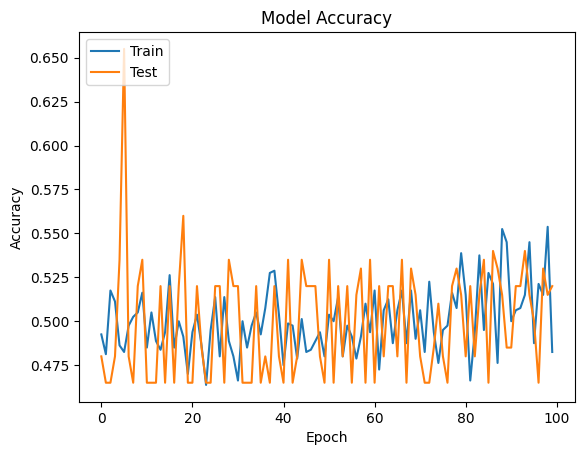

In [146]:
from keras.optimizers import RMSprop
# Implement the LSTM model using Keras and TensorFlow 
# Adam optimizer with learning rate of 0.001
learning_rate = 0.1
# Use the Rmsprop optimizer
# optimizer = RMSprop(learning_rate=learning_rate)
# Use the Adam optimizer
optimizer = Adam(learning_rate=learning_rate)

# Use random search to find the best hyperparameters
# # Number of LSTM units
# n_units = [50, 100, 200, 300]
# # Dropout rate
# dropout_rate = [0.2, 0.3, 0.4, 0.5]
# # Learning rate
# learning_rate = [0.001, 0.01, 0.1, 0.2]



# Create the LSTM model with 2 Lstm layers
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], 1)))
# model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

print(X_train.columns)

# Fit the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

# Plot the accuracy of the model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

7/7 [==============================] - 1s 24ms/step


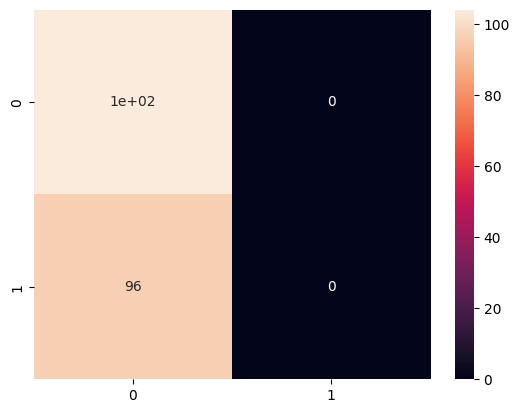

In [147]:
# Draw confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()


In [148]:
# Convert unknown targets to binary values
# encoder = LabelEncoder()
# y_test = encoder.fit_transform(y_test)
# y_pred = encoder.transform(y_pred)

# # Calculate accuracy
# y_pred = (y_pred > 0.5).astype(int)
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy}')

In [149]:
# # Setup the data to calculate the odds ratio
# df = df.dropna()
# X = df.drop(columns=['Class'])
# y = df['Class']
# df.head()

In [150]:
# #Shape of the data
# print('Shape of the data:', df.shape)


In [151]:
# from sklearn.feature_selection import chi2

# # Assuming X is your feature matrix and y is your target vector
# # X and y should be numpy arrays or similar data structures

# # Perform the chi-square test
# chi2_scores, p_values = chi2(X, y)

# # Print the chi-square scores and p-values for each feature along with the feature name
# for i in range(len(chi2_scores)):
#     print(f'Feature {i} ({X.columns[i]}): Chi2={chi2_scores[i]}')

# # Log-transform the p-values
# log_p_values = -np.log10(p_values)
# # Print the log-transformed p-values for each feature along with the feature name
# for i in range(len(log_p_values)):
#     print(f'Feature {i} ({X.columns[i]}): log-transformed p-value ={log_p_values[i]}')





In [152]:
# # Calculate the odds ratio for each feature against the class
# def odds_ratio(df):
#     # Create a new dataframe to store the odds ratio
#     odds_df = pd.DataFrame(columns=['Feature', 'Odds Ratio'])
#     # Get the number of rows in the dataframe
#     n = df.shape[0]
#     print(n)
#     # Get the number of columns in the dataframe excluding the class column
#     m = df.shape[1] - 1
#     print(m)
#     # Iterate through the columns
#     for i in range(m):
#         # Get the name of the column
#         feature = df.columns[i]
#         # Get the number of rows where the feature is 1
#         n11 = df[df[feature] == 1].shape[0]
#         # Get the number of rows where the feature is 0
#         n10 = n - n11
#         # Get the number of rows where the target is 1
#         n1_ = df[df['Class'] == 1].shape[0]
#         # Get the number of rows where the target is 0
#         n0_ = n - n1_
#         # Get the number of rows where the feature is 1 and the target is 1
#         n11_ = df[(df[feature] == 1) & (df['Class'] == 1)].shape[0]
#         # Get the number of rows where the feature is 0 and the target is 1
#         n10_ = n1_ - n11_
#         # Get the number of rows where the feature is 1 and the target is 0
#         n01 = n11 - n11_
#         # Get the number of rows where the feature is 0 and the target is 0
#         n00 = n10 - n10_
#         # Calculate the odds ratio
#         odds_ratio = (n11_ * n00) / (n10_ * n01)
#         print('Feature: {}, Odds Ratio: {}'.format(feature, odds_ratio))
#         # Add the odds ratio to the dataframe
#         odds_df = odds_df.append({'Feature': feature, 'Odds Ratio': odds_ratio}, ignore_index=True)
#     return odds_df

In [153]:
# # Calculate the odds ratio for each feature against the class
# # Create a new dataframe to store the odds ratio
# odds_df = pd.DataFrame(columns=['Feature', 'Odds Ratio'])
# # Get the number of rows in the dataframe
# n = df.shape[0]
# # Get the number of columns in the dataframe excluding the class column
# m = df.shape[1] - 1
# # Iterate through the columns
# for i in range(m):
#     # Get the name of the column
#     feature = df.columns[i]
#     # Get the number of rows where the feature is 1 or 2
#     n11 = df[df[feature].isin([1, 2])].shape[0]
#     # Get the number of rows where the feature is 0
#     n10 = n - n11
#     # Get the number of rows where the target is 1
#     n1_ = df[df['Class'] == 1].shape[0]
#     # Get the number of rows where the target is 0
#     n0_ = n - n1_
#     # Get the number of rows where the feature is 1 or 2 and the target is 1
#     n11_ = df[(df[feature].isin([1, 2])) & (df['Class'] == 1)].shape[0]
#     # Get the number of rows where the feature is 0 and the target is 1
#     n10_ = n1_ - n11_
#     # Get the number of rows where the feature is 1 or 2 and the target is 0
#     n01 = n11 - n11_
#     # Get the number of rows where the feature is 0 and the target is 0
#     n00 = n10 - n10_
#     # Calculate the odds ratio
#     odds_ratio = (n11_ * n00) / (n10_ * n01)
#     print('Feature: {}, Odds Ratio: {}'.format(feature, odds_ratio))
#     # Add the odds ratio to the dataframe
#     # Create a new DataFrame with the row to append
#     new_row = pd.DataFrame({'Feature': feature, 'Odds Ratio': odds_ratio}, index=[0])

#     # Append the new row to the existing DataFrame
#     odds_df = pd.concat([odds_df, new_row], ignore_index=True)

In [154]:
# # Implement LSTM model to predict the class of the dataset
# from keras.models import Sequential
# from keras.layers import Dense, LSTM, Embedding, SpatialDropout1D
# from sklearn.preprocessing import LabelEncoder
# from keras.callbacks import EarlyStopping
# from keras.optimizers import Adam
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from keras.utils import to_categorical
# import tensorflow as tf

# # Split the data into 3 parts: training, validation, and testing
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# # Encode the target variable
# encoder = LabelEncoder()
# encoder.fit(y_train)
# y_train = encoder.transform(y_train)
# y_val = encoder.transform(y_val)
# y_test = encoder.transform(y_test)

# # Convert the target variable to categorical
# y_train = to_categorical(y_train)
# y_val = to_categorical(y_val)
# y_test = to_categorical(y_test)


# # Create the LSTM model
# model = Sequential()
# model.add(Embedding(3, 64, input_length=100))
# model.add(SpatialDropout1D(0.2))
# model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(2, activation='softmax'))

# # Set learning rate for the optimizer and compile the model
# opt = Adam(learning_rate=0.01)
# model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# # Train the model
# history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

# # Plot the training and validation accuracy
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Model Accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.show()

# y_pred = model.predict(X_test)

# # Convert the predicted probabilities to class labels
# y_pred_labels = np.argmax(y_pred, axis=1)
# y_test_labels = np.argmax(y_test, axis=1)

# # Calculate the accuracy of the model
# accuracy = accuracy_score(y_test_labels, y_pred_labels)
# print('Accuracy: {}'.format(accuracy))

# # # Plot the confusion matrix of the model
# from sklearn.metrics import confusion_matrix
# import seaborn as sns

# # # Get the confusion matrix
# cm = confusion_matrix(y_test_labels, y_pred_labels)

# # # Plot the confusion matrix
# plt.figure(figsize=(12, 8))
# sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

